In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import dirname
from pandas import read_csv, concat
sns.set_theme(style='white', context='notebook', font_scale=1.2)
ROOT_DIR = dirname(dirname(dirname(os.path.realpath('__file__'))))
np.random.seed(47404)

In [6]:
## Load data.
data = concat([read_csv(os.path.join(ROOT_DIR, 'study01', 'data', session, 'pgng.csv'))
               for session in ['s1','s2','s3','s4']])

## Restrict participants.
reject = read_csv(os.path.join(ROOT_DIR, 'study01', 'data', 's1', 'reject.csv'))
data = data[data.subject.isin(reject.query('reject==0').subject)].reset_index(drop=True)

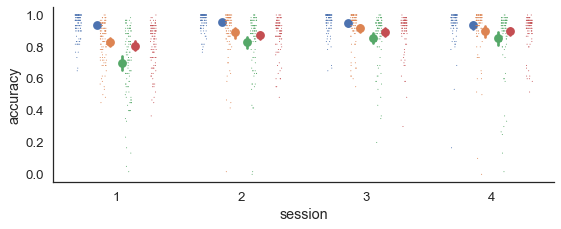

In [29]:
hue_order = ['gw','gal','ngw','ngal']

## Initialize canvas.
fig = plt.figure(figsize=(8,9))

## 
ax = plt.subplot2grid((3,4), (0,0), rowspan=1, colspan=4)

gb = data.groupby(['subject','session','robot']).accuracy.mean().reset_index()

sns.pointplot(x='session', y='accuracy', hue='robot', data=gb, hue_order=hue_order,
              join=False, dodge=0.3, ax=ax)
sns.stripplot(x='session', y='accuracy', hue='robot', data=gb, hue_order=hue_order,
              dodge=0.3, size=1, ax=ax)
ax.legend_.set_visible(False)

sns.despine()
plt.tight_layout()

In [28]:
sns.stripplot?

Signature:
sns.stripplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    jitter=True,
    dodge=False,
    orient=None,
    color=None,
    palette=None,
    size=5,
    edgecolor='gray',
    linewidth=0,
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatterplot where one variable is categorical.

A strip plot can be drawn on its own, but it is also a good complement
to a box or violin plot in cases where you want to show all observations
along with some representation of the underlying distribution.


Input data can be passed in a variety of formats, including:

- Vectors of data represented as lists, numpy arrays, or pandas Series
  objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
- A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
  variables will determine how the data are plotted.
- A "wide-form" DataFrame, such that each numeric column will be plotted.
- An array or list of vectors.

I